In [1]:
%load_ext autoreload
%autoreload 3

In [2]:
import xarray as xr
import gsw

In [4]:
import sys
sys.path.append('../src/training-on-CM2.6/')
from helpers.cm26 import DatasetCM26

In [15]:
from helpers.selectors import *

In [5]:
test = DatasetCM26(source='3d-validate')

In [6]:
test.data

<xarray.Dataset> Size: 70GB
Dimensions:  (time: 12, zl: 50, yh: 2700, xq: 3600, yq: 2700, xh: 3600)
Coordinates:
  * yh       (yh) float64 22kB -81.11 -81.07 -81.02 -80.98 ... 89.89 89.94 89.98
  * xq       (xq) float64 29kB -279.9 -279.8 -279.7 -279.6 ... 79.8 79.9 80.0
  * zl       (zl) float64 400B 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * xh       (xh) float64 29kB -279.9 -279.8 -279.7 -279.6 ... 79.75 79.85 79.95
  * yq       (yq) float64 22kB -81.09 -81.05 -81.0 -80.96 ... 89.92 89.96 90.0
  * time     (time) object 96B 0194-01-13 12:00:00 ... 0194-12-14 12:00:00
Data variables:
    u        (time, zl, yh, xq) float32 23GB dask.array<chunksize=(1, 1, 2700, 3600), meta=np.ndarray>
    v        (time, zl, yq, xh) float32 23GB dask.array<chunksize=(1, 1, 2700, 3600), meta=np.ndarray>
    rho      (time, zl, yh, xh) float32 23GB dask.array<chunksize=(1, 1, 2700, 3600), meta=np.ndarray>

In [7]:
ds_coarse = test.compute_subfilter_forcing(percentile=1)

In [9]:
ds_coarse.data

<xarray.Dataset> Size: 23GB
Dimensions:  (xq: 900, yh: 675, zl: 50, time: 12, xh: 900, yq: 675)
Coordinates:
  * xq       (xq) float64 7kB -279.6 -279.2 -278.8 -278.4 ... 79.2 79.6 80.0
  * yh       (yh) float64 5kB -81.05 -80.88 -80.71 -80.54 ... 89.58 89.75 89.92
  * zl       (zl) float64 400B 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * xh       (xh) float64 7kB -279.8 -279.4 -279.0 -278.6 ... 79.0 79.4 79.8
  * yq       (yq) float64 5kB -80.96 -80.79 -80.62 -80.45 ... 89.66 89.83 90.0
  * time     (time) object 96B 0194-01-13 12:00:00 ... 0194-12-14 12:00:00
Data variables:
    u        (time, zl, yh, xq) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    v        (time, zl, yq, xh) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    rho      (time, zl, yh, xh) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    SGSx     (time, zl, yh, xq) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    SGSy     (time, zl, yq, xh) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    Txx      (time, zl, yh, xh) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    Tyy      (time, zl, yh, xh) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    Txy      (time, zl, yh, xh) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>

In [10]:
ds_coarse, \
                u_at_T, v_at_T, rho_at_T, \
                u_filtered, v_filtered, rho_filtered, \
                Fx_hires, Fy_hires, \
                Fx_filtered_tendency, Fy_filtered_tendency, \
                Fx_filtered_state, Fy_filtered_state, \
                Fx, Fy  = test.compute_subfilter_forcing_rho(ds_coarse=ds_coarse, debug=True)

In [11]:
ds_coarse.data

<xarray.Dataset> Size: 29GB
Dimensions:  (xq: 900, yh: 675, zl: 50, time: 12, xh: 900, yq: 675)
Coordinates:
  * xq       (xq) float64 7kB -279.6 -279.2 -278.8 -278.4 ... 79.2 79.6 80.0
  * yh       (yh) float64 5kB -81.05 -80.88 -80.71 -80.54 ... 89.58 89.75 89.92
  * zl       (zl) float64 400B 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * xh       (xh) float64 7kB -279.8 -279.4 -279.0 -278.6 ... 79.0 79.4 79.8
  * yq       (yq) float64 5kB -80.96 -80.79 -80.62 -80.45 ... 89.66 89.83 90.0
  * time     (time) object 96B 0194-01-13 12:00:00 ... 0194-12-14 12:00:00
Data variables:
    u        (time, zl, yh, xq) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    v        (time, zl, yq, xh) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    rho      (time, zl, yh, xh) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    SGSx     (time, zl, yh, xq) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    SGSy     (time, zl, yq, xh) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    Txx      (time, zl, yh, xh) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    Tyy      (time, zl, yh, xh) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    Txy      (time, zl, yh, xh) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    Fx       (time, zl, yh, xh) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    Fy       (time, zl, yh, xh) float64 3GB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>

In [20]:
Fx_temp = ds_coarse.data.Fx.isel(time=0)#.compute()

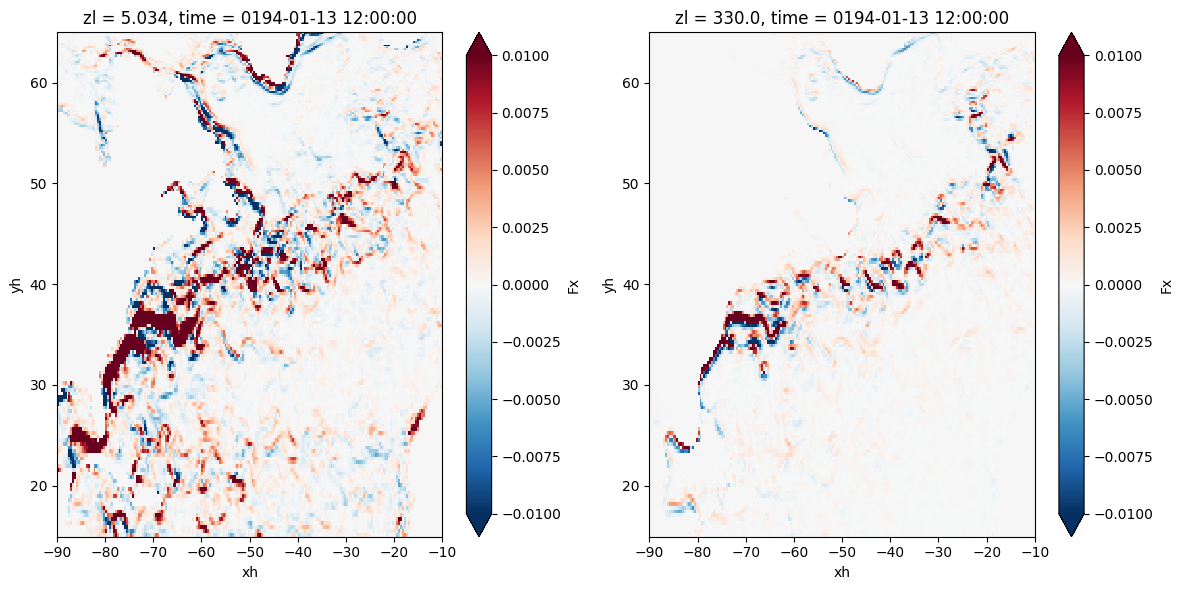

In [21]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
select_NA(Fx_temp).isel(zl=0).plot(robust=True, vmin=-0.01, vmax=0.01, cmap='RdBu_r')

plt.subplot(1,2,2)
select_NA(Fx_temp).isel(zl=20).plot(robust=True, vmin=-0.01, vmax=0.01, cmap='RdBu_r')

plt.tight_layout()

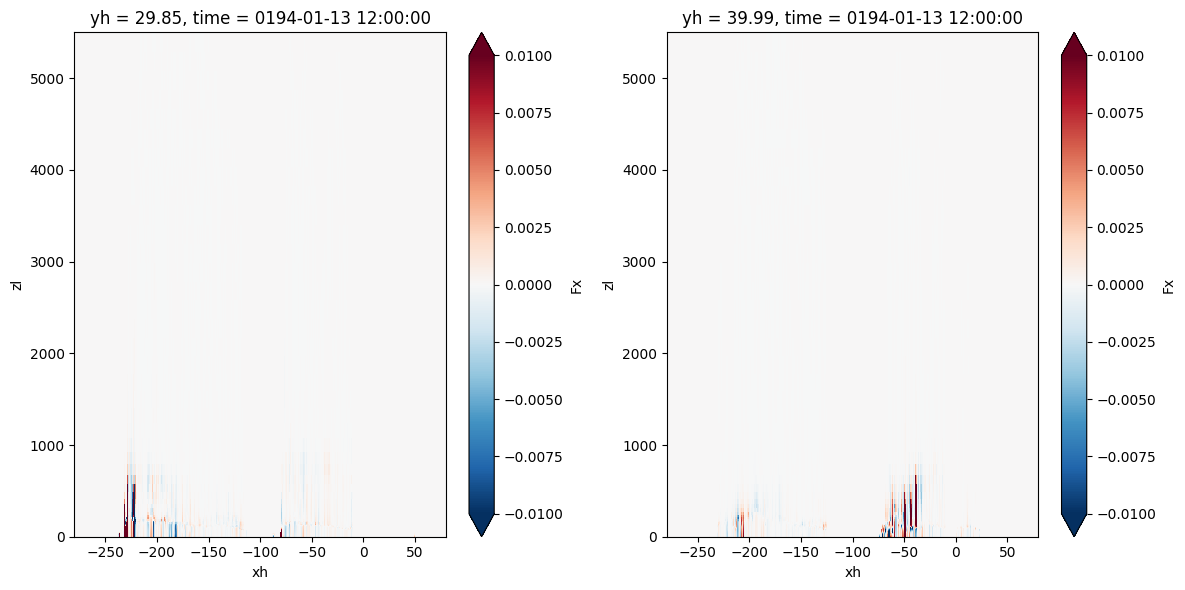

In [22]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
Fx_temp.sel(yh=30, method='nearest').plot(robust=True, vmin=-0.01, vmax=0.01, cmap='RdBu_r')

plt.subplot(1,2,2)
Fx_temp.sel(yh=40, method='nearest').plot(robust=True, vmin=-0.01, vmax=0.01, cmap='RdBu_r')

plt.tight_layout()

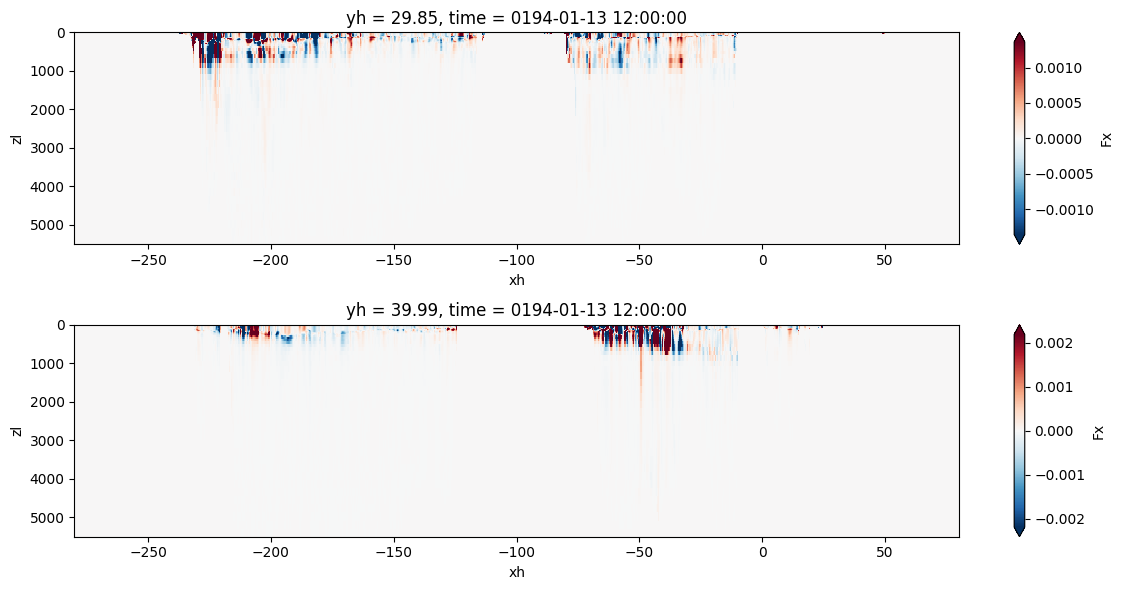

In [24]:
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
Fx_temp.sel(yh=30, method='nearest').plot(robust=True,  cmap='RdBu_r')
plt.gca().invert_yaxis()

plt.subplot(2,1,2)
Fx_temp.sel(yh=40, method='nearest').plot(robust=True,  cmap='RdBu_r')
plt.gca().invert_yaxis()
plt.tight_layout()